# Data Importing

In [1]:
import pandas as pd
#C://Users//bijoy//Dropbox//PC//Downloads//GHG_SouthAsia//test2.xlsx
#df = pd.read_excel("C:/Users/Bijoy/Downloads/airpoltest/Final/Points/new.xlsx")
#df= df.drop(['Zone'],axis=1)
df = pd.read_excel("E://BIJOY_GIS//project_air_pol//Global_PM2.5//!CompleteTrain.xlsx")
df= df.drop(['Region','FID','Id','PM25_org'],axis=1)
df#.describe()

,PM25,X,Y,NDVI,NDBI,MNDWI,DEM,NTL,LST
0,1.760455,43.075696,10.083458,0.233707,0.103238,-0.441356,1484,0.161978,310.365438
1,1.760455,43.527811,10.083458,0.237938,0.140716,-0.451067,1413,0.158229,310.041212
2,1.801270,43.979926,10.083458,0.219778,0.117881,-0.403485,759,0.167162,312.169284
3,1.841122,44.432040,10.083458,0.130274,0.139700,-0.477442,496,0.186774,315.994085
4,1.818728,44.884155,10.083458,0.126678,0.116530,-0.372730,643,0.191910,315.389267
...,...,...,...,...,...,...,...,...,...
49912,1.523277,-55.111800,5.678925,0.642777,-0.301792,-0.338804,11,0.883484,304.668871
49913,1.523277,-54.784319,5.678925,0.593957,-0.298592,-0.286398,20,0.187292,303.990573
49914,1.522663,-54.456838,5.678925,0.571804,-0.296414,-0.263144,16,0.188188,304.388080
49915,1.522663,-54.129357,5.678925,0.505683,-0.266910,-0.216042,12,0.184743,305.365465


In [2]:
df.corr()

,PM25,X,Y,NDVI,NDBI,MNDWI,DEM,NTL,LST
PM25,1.000000,0.411197,-0.101264,-0.181930,0.582875,-0.409349,-0.268845,-0.003571,0.624833
X,0.411197,1.000000,0.233582,-0.192025,0.122732,0.023520,0.060472,0.000962,-0.024498
Y,-0.101264,0.233582,1.000000,-0.512782,-0.314670,0.627547,0.020872,0.040096,-0.586465
NDVI,-0.181930,-0.192025,-0.512782,1.000000,-0.190217,-0.507543,-0.284587,-0.011125,0.144134
NDBI,0.582875,0.122732,-0.314670,-0.190217,1.000000,-0.734520,0.043823,-0.000308,0.789761
MNDWI,-0.409349,0.023520,0.627547,-0.507543,-0.734520,1.000000,0.146391,0.012456,-0.801310
DEM,-0.268845,0.060472,0.020872,-0.284587,0.043823,0.146391,1.000000,-0.040208,-0.180883
NTL,-0.003571,0.000962,0.040096,-0.011125,-0.000308,0.012456,-0.040208,1.000000,-0.009532
LST,0.624833,-0.024498,-0.586465,0.144134,0.789761,-0.801310,-0.180883,-0.009532,1.000000


Data importing

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, Flatten


# Load your dataset
df = df
# Define features and target variable
X = df.drop(['PM25'],axis=1)
y = df['PM25']

# Splitting dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape the input data for CNN
X_train = X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1)

# Scaling features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.reshape(X_train.shape[0], -1)).reshape(X_train.shape)
X_test = scaler.transform(X_test.reshape(X_test.shape[0], -1)).reshape(X_test.shape)


# Integrating Hyperparameter tuning and Monte Carlo simulation to predict log(PM2.5) in a CNN model

Defining Bayesian Optimization-based Hyperparameters

In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, Flatten
from bayes_opt import BayesianOptimization


def cnn_model(num_conv_filters, kernel_size, pool_size, num_dense_neurons, dropout_rate):
    model = Sequential([
        Conv1D(int(num_conv_filters), kernel_size=int(kernel_size), activation='relu', input_shape=(X_train.shape[1], 1)),
        MaxPooling1D(pool_size=int(pool_size)),
        Flatten(),
        Dense(int(num_dense_neurons), activation='relu'),
        Dropout(dropout_rate),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    model.fit(X_train, y_train, epochs=25, batch_size=32, verbose=0)  # reduced epochs for faster optimization
    mse = model.evaluate(X_test, y_test, verbose=0)[0]
    return -mse  # Negative MSE for maximization

# Bounds of hyperparameters for Bayesian Optimization
pbounds = {
    'num_conv_filters': (16, 64),
    'kernel_size': (2, 5),
    'pool_size': (1, 3),
    'num_dense_neurons': (32, 128),
    'dropout_rate': (0.1, 0.6)
}

optimizer = BayesianOptimization(
    f=cnn_model,
    pbounds=pbounds,
    random_state=1,
    verbose=2
)
optimizer.maximize(init_points=2, n_iter=10)

# Best hyperparameters found
print("Best hyperparameters:", optimizer.max['params'])


|   iter    |  target   | dropou... | kernel... | num_co... | num_de... | pool_size |
-------------------------------------------------------------------------------------


C:\Users\Bijoy\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


| 1         | -0.00417  | 0.3085    | 4.161     | 16.01     | 61.02     | 1.294     |


C:\Users\Bijoy\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


| 2         | -0.004756 | 0.1462    | 2.559     | 32.59     | 70.09     | 2.078     |


C:\Users\Bijoy\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


| 3         | -0.005671 | 0.4254    | 4.987     | 16.75     | 60.73     | 1.277     |


C:\Users\Bijoy\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


| 4         | -0.003514 | 0.2499    | 3.375     | 44.13     | 103.3     | 1.948     |


C:\Users\Bijoy\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


| 5         | -0.006358 | 0.4681    | 4.071     | 20.6      | 96.76     | 2.304     |


C:\Users\Bijoy\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


| 6         | -0.003687 | 0.2942    | 4.777     | 56.74     | 88.31     | 1.439     |


C:\Users\Bijoy\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


| 7         | -0.004447 | 0.1404    | 4.55      | 54.46     | 98.04     | 2.512     |


C:\Users\Bijoy\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


| 8         | -0.005799 | 0.2169    | 2.412     | 58.43     | 32.56     | 2.498     |


C:\Users\Bijoy\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


| 9         | -0.005697 | 0.3752    | 2.642     | 63.17     | 72.93     | 2.65      |


C:\Users\Bijoy\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


| 10        | -0.004143 | 0.4307    | 3.513     | 28.53     | 91.74     | 1.814     |


C:\Users\Bijoy\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


| 11        | -0.005663 | 0.1704    | 2.801     | 56.83     | 75.1      | 2.421     |


C:\Users\Bijoy\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


| 12        | -0.004328 | 0.3345    | 2.113     | 22.25     | 99.75     | 1.937     |
Best hyperparameters: {'dropout_rate': 0.24994931643102422, 'kernel_size': 3.375388159922661, 'num_conv_filters': 44.13461222494382, 'num_dense_neurons': 103.33641722263984, 'pool_size': 1.948395170673184}


Defining Hyperparameetrs

In [7]:
max_dropout_rate = optimizer.max['params']['dropout_rate']
max_kernel_size = optimizer.max['params']['kernel_size']
max_num_conv_filters = optimizer.max['params']['num_conv_filters']
max_num_dense_neurons = optimizer.max['params']['num_dense_neurons']
max_pool_size = optimizer.max['params']['pool_size']


Building Monte Carlo Simulation in a 1D CNN model

In [8]:
# Constants for the simulation
n_simulations = 20  # Number of simulations to run
results = {'train_rmse': [], 'train_r2': [], 'test_rmse': [], 'test_r2': []}

for i in range(n_simulations):
    # Splitting dataset into training and testing set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)  # Removed random_state for randomness

    # Reshape the input data for CNN
    X_train = X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1)
    X_test = X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1)

    # Scaling features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train.reshape(X_train.shape[0], -1)).reshape(X_train.shape)
    X_test = scaler.transform(X_test.reshape(X_test.shape[0], -1)).reshape(X_test.shape)

    # Using the best hyperparameters
    dropout_rate = max_dropout_rate
    kernel_size = int(round(max_kernel_size))
    num_conv_filters = int(round(max_num_conv_filters))
    num_dense_neurons = int(round(max_num_dense_neurons))
    pool_size = int(round(max_pool_size))

    # Defining the CNN model with the optimized hyperparameters
    model = Sequential([
        Conv1D(num_conv_filters, kernel_size=kernel_size, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
        MaxPooling1D(pool_size=pool_size),
        Flatten(),
        Dense(num_dense_neurons, activation='relu'),
        Dropout(dropout_rate),
        Dense(1)
    ])

    # Compiling the model
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])

    # Fitting the model
    model.fit(X_train, y_train, epochs=25, batch_size=32, verbose=0)  # Set verbose to 0 to reduce log clutter

    # Making predictions on training data
    y_train_pred = model.predict(X_train)
    # Making predictions on testing data
    y_pred = model.predict(X_test)

    # Calculate metrics
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    train_r2 = r2_score(y_train, y_train_pred)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    test_r2 = r2_score(y_test, y_pred)

    # Store results
    results['train_rmse'].append(train_rmse)
    results['train_r2'].append(train_r2)
    results['test_rmse'].append(test_rmse)
    results['test_r2'].append(test_r2)


C:\Users\Bijoy\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


1248/1248 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


C:\Users\Bijoy\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


1248/1248 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


C:\Users\Bijoy\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


1248/1248 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


C:\Users\Bijoy\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


1248/1248 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


C:\Users\Bijoy\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


1248/1248 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


C:\Users\Bijoy\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


1248/1248 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


C:\Users\Bijoy\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


1248/1248 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


C:\Users\Bijoy\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


1248/1248 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


C:\Users\Bijoy\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


1248/1248 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


C:\Users\Bijoy\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


1248/1248 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


C:\Users\Bijoy\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


1248/1248 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


C:\Users\Bijoy\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


1248/1248 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


C:\Users\Bijoy\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


1248/1248 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


C:\Users\Bijoy\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


1248/1248 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


C:\Users\Bijoy\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


1248/1248 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


C:\Users\Bijoy\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


1248/1248 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


C:\Users\Bijoy\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


1248/1248 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


C:\Users\Bijoy\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


1248/1248 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


C:\Users\Bijoy\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


1248/1248 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


C:\Users\Bijoy\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


1248/1248 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


Model Performance

In [9]:
# Compute average and standard deviation of results
avg_train_rmse = np.mean(results['train_rmse'])
avg_train_r2 = np.mean(results['train_r2'])
avg_test_rmse = np.mean(results['test_rmse'])
avg_test_r2 = np.mean(results['test_r2'])

print(f"Average Train RMSE: {avg_train_rmse:.5f}")
print(f"Average Train R2: {avg_train_r2:.5f}")
print(f"Average Test RMSE: {avg_test_rmse:.5f}")
print(f"Average Test R2: {avg_test_r2:.5f}")

Average Train RMSE: 0.07158
Average Train R2: 0.95139
Average Test RMSE: 0.07230
Average Test R2: 0.95017


# Making Validation loss plot for each simulation

In [11]:
# Constants for the simulation
n_simulations = 20  # Number of simulations to run
all_val_losses = []

for i in range(n_simulations):
    # Splitting dataset into training and testing set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)

    # Reshape and scale the data as needed for your model
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Define the model with the structure you're using
    model = Sequential([
        Conv1D(64, 3, activation='relu', input_shape=(X_train.shape[1], 1)),
        MaxPooling1D(2),
        Flatten(),
        Dense(100, activation='relu'),
        Dropout(0.5),
        Dense(1)
    ])

    model.compile(optimizer='adam', loss='mse')

    # Train the model and save the history
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, verbose=0)
    
    # Store the validation losses
    all_val_losses.append(history.history['val_loss'])


C:\Users\Bijoy\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(
C:\Users\Bijoy\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(
C:\Users\Bijoy\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(
C:\Users\Bijoy\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass

KeyboardInterrupt: 

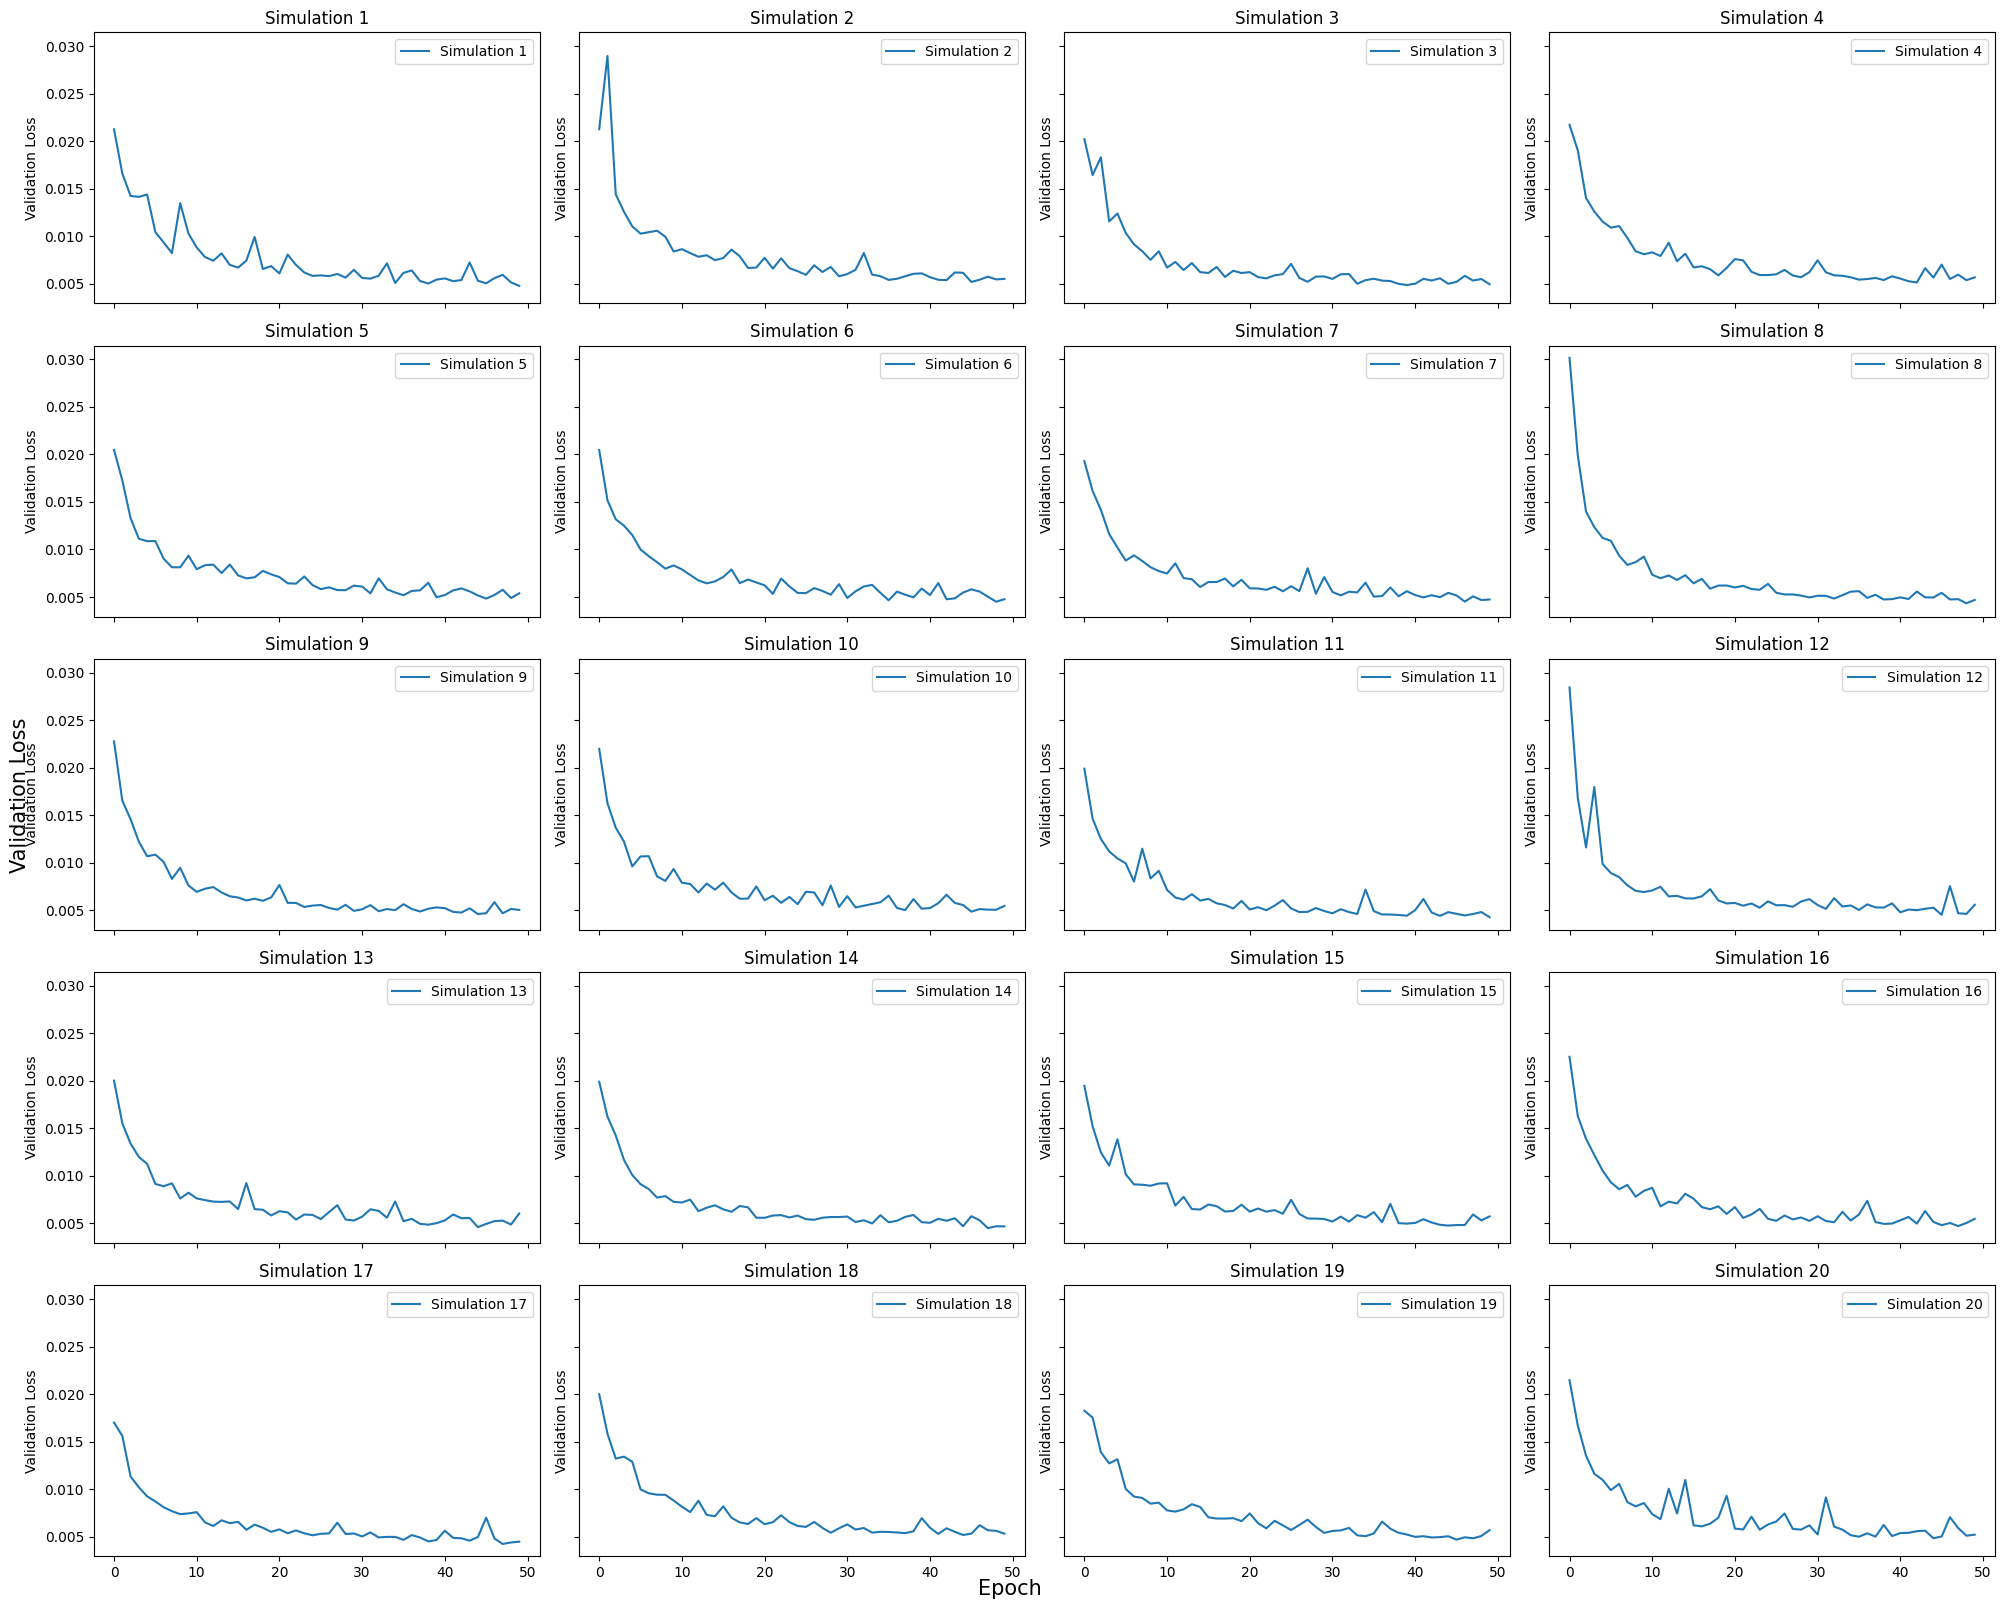

In [22]:
import matplotlib.pyplot as plt

# Define the number of simulations
num_simulations = len(all_val_losses)

# Create subplots with a 5x4 grid layout
fig, axes = plt.subplots(5, 4, figsize=(20, 16), sharex=True, sharey=True)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate through each simulation and plot on a separate subplot
for i, val_losses in enumerate(all_val_losses):
    ax = axes[i]
    ax.plot(val_losses, label=f'Simulation {i+1}')
    ax.set_title(f'Simulation {i+1}')
    ax.set_ylabel('Validation Loss')
    ax.legend()

# Hide empty subplots
for i in range(num_simulations, len(axes)):
    axes[i].axis('off')

# Set common X and Y labels
fig.text(0.5, 0.00, 'Epoch', ha='center', fontsize= 15)
fig.text(0.0, 0.5, 'Validation Loss', va='center', rotation='vertical', fontsize= 15)

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


# Predicting for unseen data

In [60]:
import pandas as pd
#C://Users//bijoy//Dropbox//PC//Downloads//GHG_SouthAsia//test2.xlsx
df_p = pd.read_excel("E:/BIJOY_GIS\project_air_pol\Simulation\Data/1_city_Dataset.xlsx", sheet_name='Warsaw')

df_p= df_p.drop(['FID','Id'],axis=1)
df_p#.describe()

,X,Y,NDVI,NDBI,MNDWI,DEM,NTL,LST
0,20.780320,51.985916,0.462746,-0.276193,-0.185756,171,1.035850,297.114014
1,20.801688,51.985916,0.321668,-0.161352,-0.176758,157,0.604201,296.691010
2,20.823055,51.985916,0.439945,-0.208865,-0.244650,153,2.122070,296.334992
3,20.844423,51.985916,0.271059,-0.205686,-0.078244,143,16.082300,296.227997
4,20.865790,51.985916,0.432098,-0.267286,-0.162072,134,1.265180,296.222992
...,...,...,...,...,...,...,...,...
1195,21.314509,52.438311,0.405277,-0.162319,-0.263378,98,1.406460,295.656006
1196,21.335877,52.438311,0.265427,-0.148718,-0.138546,103,1.355850,296.881988
1197,21.357244,52.438311,0.300020,-0.163154,-0.144947,107,0.137599,296.105011
1198,21.378612,52.438311,0.345140,-0.140252,-0.202364,109,-0.093820,298.087006


In [61]:
# Assuming df_p has similar structure to df_a
# Preprocessing df_p similar to df_a
X_p = df_p.values.reshape(df_p.shape[0], df_p.shape[1], 1)
X_p = scaler.transform(X_p.reshape(X_p.shape[0], -1)).reshape(X_p.shape)

# Making predictions on df_p
y_pred_p = model.predict(X_p)

# Adding predicted PM2.5 values to df_p
df_p['Predicted_PM25'] = y_pred_p
df_p
# Exporting df_p with predicted PM2.5 values
df_p.to_excel("E:/BIJOY_GIS\project_air_pol\Simulation\Data/1_sim_city_Dataset.xlsx", index=False)

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
